Connected to mlp (Python 3.12.5)

['a', 'b', 'a', 'b', 'b', 'b', 'a', 'c', 'c', 'b', 'b', 'h', 'k', 'b', 'b', 'b', 'm', 'a', 'a', 'c', 'a', 'b', 'b', 'c', 'b', 'e', 'i', 'a', 'c', 'b', 'b', 'b', 'a', 'b', 'b', 'g', 'f', 'f', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'c']
counts:
[('a', 11), ('b', 25), ('c', 6), ('d', 0), ('e', 1), ('f', 2), ('g', 1), ('h', 1), ('i', 1), ('j', 0), ('k', 1), ('l', 0), ('m', 1), ('n', 0)]
est probs:
[('a', 0.22), ('b', 0.5), ('c', 0.12), ('d', 0.0), ('e', 0.02), ('f', 0.04), ('g', 0.02), ('h', 0.02), ('i', 0.02), ('j', 0.0), ('k', 0.02), ('l', 0.0), ('m', 0.02), ('n', 0.0)]


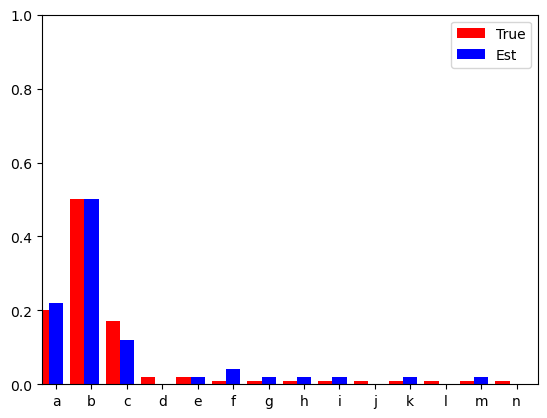

likelihoods:  0 0
log likelihoods:  0 0


In [ ]:
'''
Author: Sharon Goldwater 
Date: 2014-09-01, updated 2017-09-30
Copyright: This work is licensed under a Creative Commons
Attribution-NonCommercial 4.0 International License
(http://creativecommons.org/licenses/by-nc/4.0/): You may re-use,
redistribute, or modify this work for non-commercial purposes provided
you retain attribution to any previous author(s).
'''
#from __future__ import division
import sys
from math import log, isclose
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample


#This function isn't actually used in the lab, but included to show
#a simpler example of a bar chart than plot_distributions below.
def plot_histogram(values, counts):
    '''plot_histogram is a very general function that takes a list of
    values and a list of counts (one for each value, counts need no be
    integers), and makes a bar plot showing the count for each value.
    '''
    if len(values) != len(counts):
        print('ERROR: plot_histogram requires two list arguments of the same length')
        sys.exit(1)
    plt.clf()
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(counts)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    plt.bar(x_pos,counts)
    #default bar width is .8, so put labels at left side + .4 (middle of bar)
    plt.xticks(x_pos+.4, values)
    plt.ylim([0,sum(counts)])
    plt.show()

def plot_distributions(true_distr, est_distr):
    ''' plot_distributions takes two distributions, represented as
    dictionaries, with key-value pairs being each outcome and its
    probability.  The first argument is assumed to be the true
    distribution and the second one an estimated distribution. It
    plots these next to each other in a bar plot.  
    '''
    #When we access the items in a dictionary, they are in no
    #particular order, so to make sure the true and estimated
    #probabilities correspond to the same outcome, we need to sort the
    #items in each dictionary, and we also checked to make sure that
    #the keys in the dictionaries match (i.e., they are distributions
    #over the same set of outcomes)
    plt.clf()
    sorted_true = sorted(true_distr.items()) #get sorted list of (key,val) pairs
    #next lines use list comrehension, a concise way to replace for loops
    true_labels = [item[0] for item in sorted_true] #list of keys, still sorted
    true_probs = [item[1] for item in sorted_true] #list of values, still sorted
    sorted_est = sorted(est_distr.items())
    est_labels = [item[0] for item in sorted_est]
    est_probs = [item[1] for item in sorted_est]
    if (true_labels != est_labels):
        print('ERROR: plot_distributions requires two distributions over the same set of outcomes')
        sys.exit(1)
    #the x_pos array will be the position of left side of each bar
    #arange() is like range() except creates an array instead of list
    x_pos = np.arange(len(true_labels))
    bar_width = .4 
    #bar() requires the position and height of each bar;
    #we also add a the width and color
    bars1 = plt.bar(x_pos, true_probs, bar_width, color='r')
    #second distribution has bars shifted to the right by .4
    bars2 = plt.bar(x_pos+.4, est_probs, bar_width, color='b')
    plt.xticks(x_pos+.4, true_labels)
    plt.legend( (bars1[0], bars2[0]), ('True', 'Est'))
    plt.ylim([0,sum(true_probs)]) #set max value of y axis
    plt.xlim([0,len(true_labels)])  #set max value of x axis
    plt.show()

def generate_random_sequence(distribution, N):
    ''' generate_random_sequence takes a distribution (represented as a
    dictionary of outcome-probability pairs) and a number of samples N
    and returns a list of N samples from the distribution.  
    This is a modified version of a sequence generator by fraxel on
    StackOverflow:
    http://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy
    '''
    #As noted elsewhere, the ordering of keys and values accessed from
    #a dictionary is arbitrary. However we are guaranteed that keys()
    #and values() will use the *same* ordering, as long as we have not
    #modified the dictionary in between calling them.
    outcomes = np.array(list(distribution.keys()))
    probs = np.array(list(distribution.values()))
    #make an array with the cumulative sum of probabilities at each
    #index (ie prob. mass func)
    bins = np.cumsum(probs)
    #create N random #s from 0-1
    #digitize tells us which bin they fall into.
    #return the sequence of outcomes associated with that sequence of bins
    #(we convert it from array back to list first)
    return list(outcomes[np.digitize(random_sample(N), bins)])

def normalize_counts(counts):
    ''' normalize_counts takes a dictionary of counts as an argument and
    returns a corresponding dictionary of probabilities by normalizing
    the counts to sum to 1.
    '''
    total_counts = sum(counts.values()) 
    normalized_counts = {key: value / total_counts for key, value in counts.items()}
    ## students need to fill in correct function
    return normalized_counts

def compute_likelihood(data, model):
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the likelihood P(data | model)
    '''
    ## students need to fill in correct function
    return 0
        
def compute_log_likelihood(data, model):        
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the log (base 10) of the
    likelihood
    '''
    ## students need to fill in correct function
    return 0

## Main body of code ##

#Create a dictionary that stores a probability distribution
distribution = dict([('a', 0.2),
                    ('b', 0.5),
                    ('c', 0.17),
                    ('d', 0.02),
                    ('e', 0.02),
                    ('f', 0.01),
                    ('g', 0.01),
                    ('h', 0.01),
                    ('i', 0.01),
                    ('j', 0.01),
                    ('k', 0.01),
                    ('l', 0.01),
                    ('m', 0.01),
                    ('n', 0.01)])
if not (isclose(sum(list(distribution.values())), 1.0)):
    print('ERROR: Probability distribution does not sum to 1')
    sys.exit(1)

#Generate a sequence of 50 samples from the distribution.
str_list = generate_random_sequence(distribution, 50)
#str_list = generate_random_sequence(distribution, 500) #or do 500
print(str_list)

#count how many times each outcome occurred in the sequence and store
#that in a dictionary
#Uses a list comprehension but it could be done with a for loop
str_counts = dict([(s, str_list.count(s)) for s in distribution.keys()])
print('counts:')
print(sorted(str_counts.items()))

#normalize to get an estimate of the original distribution
str_probs = normalize_counts(str_counts)
print('est probs:')
print(sorted(str_probs.items()))

#compare the true and estimated distributions visually
plot_distributions(distribution, str_probs)

#for later parts of lab - these functions currently just return 0
L1 = compute_likelihood(str_list,distribution)
L2 = compute_likelihood(str_list,str_probs)
LL1 = compute_log_likelihood(str_list,distribution)
LL2 = compute_log_likelihood(str_list,str_probs)
print('likelihoods: ', L1, L2)
print('log likelihoods: ', LL1, LL2)

['e', 'g', 'c', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'c', 'c', 'b', 'b', 'a', 'j', 'c', 'c', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd', 'b', 'b', 'g', 'b', 'a', 'a', 'a', 'c', 'b', 'a', 'c', 'b', 'b', 'n', 'm', 'b', 'a', 'b', 'c', 'b', 'b', 'c', 'b', 'c']
counts:
[('a', 8), ('b', 25), ('c', 10), ('d', 1), ('e', 1), ('f', 0), ('g', 2), ('h', 0), ('i', 0), ('j', 1), ('k', 0), ('l', 0), ('m', 1), ('n', 1)]
est probs:
[('a', 0.16), ('b', 0.5), ('c', 0.2), ('d', 0.02), ('e', 0.02), ('f', 0.0), ('g', 0.04), ('h', 0.0), ('i', 0.0), ('j', 0.02), ('k', 0.0), ('l', 0.0), ('m', 0.02), ('n', 0.02)]


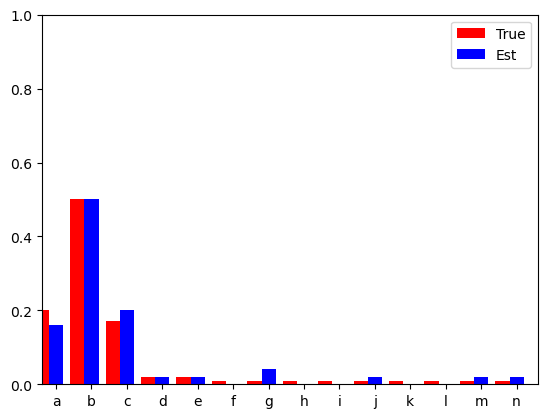

ValueError: math domain error

In [ ]:
'''
Author: Sharon Goldwater 
Date: 2014-09-01, updated 2017-09-30
Copyright: This work is licensed under a Creative Commons
Attribution-NonCommercial 4.0 International License
(http://creativecommons.org/licenses/by-nc/4.0/): You may re-use,
redistribute, or modify this work for non-commercial purposes provided
you retain attribution to any previous author(s).
'''
#from __future__ import division
import sys
from math import log, isclose
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample


#This function isn't actually used in the lab, but included to show
#a simpler example of a bar chart than plot_distributions below.
def plot_histogram(values, counts):
    '''plot_histogram is a very general function that takes a list of
    values and a list of counts (one for each value, counts need no be
    integers), and makes a bar plot showing the count for each value.
    '''
    if len(values) != len(counts):
        print('ERROR: plot_histogram requires two list arguments of the same length')
        sys.exit(1)
    plt.clf()
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(counts)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    plt.bar(x_pos,counts)
    #default bar width is .8, so put labels at left side + .4 (middle of bar)
    plt.xticks(x_pos+.4, values)
    plt.ylim([0,sum(counts)])
    plt.show()

def plot_distributions(true_distr, est_distr):
    ''' plot_distributions takes two distributions, represented as
    dictionaries, with key-value pairs being each outcome and its
    probability.  The first argument is assumed to be the true
    distribution and the second one an estimated distribution. It
    plots these next to each other in a bar plot.  
    '''
    #When we access the items in a dictionary, they are in no
    #particular order, so to make sure the true and estimated
    #probabilities correspond to the same outcome, we need to sort the
    #items in each dictionary, and we also checked to make sure that
    #the keys in the dictionaries match (i.e., they are distributions
    #over the same set of outcomes)
    plt.clf()
    sorted_true = sorted(true_distr.items()) #get sorted list of (key,val) pairs
    #next lines use list comrehension, a concise way to replace for loops
    true_labels = [item[0] for item in sorted_true] #list of keys, still sorted
    true_probs = [item[1] for item in sorted_true] #list of values, still sorted
    sorted_est = sorted(est_distr.items())
    est_labels = [item[0] for item in sorted_est]
    est_probs = [item[1] for item in sorted_est]
    if (true_labels != est_labels):
        print('ERROR: plot_distributions requires two distributions over the same set of outcomes')
        sys.exit(1)
    #the x_pos array will be the position of left side of each bar
    #arange() is like range() except creates an array instead of list
    x_pos = np.arange(len(true_labels))
    bar_width = .4 
    #bar() requires the position and height of each bar;
    #we also add a the width and color
    bars1 = plt.bar(x_pos, true_probs, bar_width, color='r')
    #second distribution has bars shifted to the right by .4
    bars2 = plt.bar(x_pos+.4, est_probs, bar_width, color='b')
    plt.xticks(x_pos+.4, true_labels)
    plt.legend( (bars1[0], bars2[0]), ('True', 'Est'))
    plt.ylim([0,sum(true_probs)]) #set max value of y axis
    plt.xlim([0,len(true_labels)])  #set max value of x axis
    plt.show()

def generate_random_sequence(distribution, N):
    ''' generate_random_sequence takes a distribution (represented as a
    dictionary of outcome-probability pairs) and a number of samples N
    and returns a list of N samples from the distribution.  
    This is a modified version of a sequence generator by fraxel on
    StackOverflow:
    http://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy
    '''
    #As noted elsewhere, the ordering of keys and values accessed from
    #a dictionary is arbitrary. However we are guaranteed that keys()
    #and values() will use the *same* ordering, as long as we have not
    #modified the dictionary in between calling them.
    outcomes = np.array(list(distribution.keys()))
    probs = np.array(list(distribution.values()))
    #make an array with the cumulative sum of probabilities at each
    #index (ie prob. mass func)
    bins = np.cumsum(probs)
    #create N random #s from 0-1
    #digitize tells us which bin they fall into.
    #return the sequence of outcomes associated with that sequence of bins
    #(we convert it from array back to list first)
    return list(outcomes[np.digitize(random_sample(N), bins)])

def normalize_counts(counts):
    ''' normalize_counts takes a dictionary of counts as an argument and
    returns a corresponding dictionary of probabilities by normalizing
    the counts to sum to 1.
    '''
    total_counts = sum(counts.values()) 
    normalized_counts = {key: value / total_counts for key, value in counts.items()}
    ## students need to fill in correct function
    return normalized_counts

def compute_likelihood(data, model):
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the likelihood P(data | model)
    '''
    likelihood = 1
    for str in data:
        likelihood *= model[str]
    ## students need to fill in correct function
    return likelihood
        
def compute_log_likelihood(data, model):        
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the log (base 10) of the
    likelihood
    '''
    log_likelihood = log(0)
    for str in data:
        log_likelihood += np.log10(model[str])
    ## students need to fill in correct function
    return -log_likelihood

## Main body of code ##

#Create a dictionary that stores a probability distribution
distribution = dict([('a', 0.2),
                    ('b', 0.5),
                    ('c', 0.17),
                    ('d', 0.02),
                    ('e', 0.02),
                    ('f', 0.01),
                    ('g', 0.01),
                    ('h', 0.01),
                    ('i', 0.01),
                    ('j', 0.01),
                    ('k', 0.01),
                    ('l', 0.01),
                    ('m', 0.01),
                    ('n', 0.01)])
if not (isclose(sum(list(distribution.values())), 1.0)):
    print('ERROR: Probability distribution does not sum to 1')
    sys.exit(1)

#Generate a sequence of 50 samples from the distribution.
str_list = generate_random_sequence(distribution, 50)
#str_list = generate_random_sequence(distribution, 500) #or do 500
print(str_list)

#count how many times each outcome occurred in the sequence and store
#that in a dictionary
#Uses a list comprehension but it could be done with a for loop
str_counts = dict([(s, str_list.count(s)) for s in distribution.keys()])
print('counts:')
print(sorted(str_counts.items()))

#normalize to get an estimate of the original distribution
str_probs = normalize_counts(str_counts)
print('est probs:')
print(sorted(str_probs.items()))

#compare the true and estimated distributions visually
plot_distributions(distribution, str_probs)

#for later parts of lab - these functions currently just return 0
L1 = compute_likelihood(str_list,distribution)
L2 = compute_likelihood(str_list,str_probs)
LL1 = compute_log_likelihood(str_list,distribution)
LL2 = compute_log_likelihood(str_list,str_probs)
print('likelihoods: ', L1, L2)
print('log likelihoods: ', LL1, LL2)

['b', 'a', 'b', 'b', 'e', 'c', 'b', 'b', 'a', 'b', 'a', 'c', 'c', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'c', 'c', 'b', 'b', 'a', 'b', 'k', 'c', 'k', 'n', 'c', 'c', 'a', 'b', 'b', 'b', 'b', 'n', 'c', 'b', 'b', 'm', 'c', 'b', 'b', 'c', 'b']
counts:
[('a', 7), ('b', 26), ('c', 11), ('d', 0), ('e', 1), ('f', 0), ('g', 0), ('h', 0), ('i', 0), ('j', 0), ('k', 2), ('l', 0), ('m', 1), ('n', 2)]
est probs:
[('a', 0.14), ('b', 0.52), ('c', 0.22), ('d', 0.0), ('e', 0.02), ('f', 0.0), ('g', 0.0), ('h', 0.0), ('i', 0.0), ('j', 0.0), ('k', 0.04), ('l', 0.0), ('m', 0.02), ('n', 0.04)]


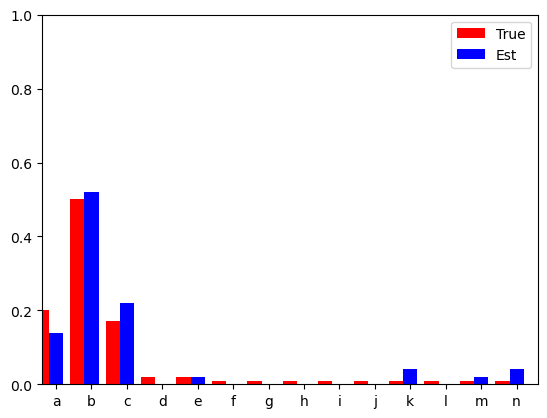

likelihoods:  1.307369091325113e-33 2.605749300992955e-30
log likelihoods:  inf inf


<ipython-input-5-4d9411f0aa2b>:129: RuntimeWarning: divide by zero encountered in log10
  log_likelihood = np.log10(0)


In [ ]:
'''
Author: Sharon Goldwater 
Date: 2014-09-01, updated 2017-09-30
Copyright: This work is licensed under a Creative Commons
Attribution-NonCommercial 4.0 International License
(http://creativecommons.org/licenses/by-nc/4.0/): You may re-use,
redistribute, or modify this work for non-commercial purposes provided
you retain attribution to any previous author(s).
'''
#from __future__ import division
import sys
from math import log, isclose
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample


#This function isn't actually used in the lab, but included to show
#a simpler example of a bar chart than plot_distributions below.
def plot_histogram(values, counts):
    '''plot_histogram is a very general function that takes a list of
    values and a list of counts (one for each value, counts need no be
    integers), and makes a bar plot showing the count for each value.
    '''
    if len(values) != len(counts):
        print('ERROR: plot_histogram requires two list arguments of the same length')
        sys.exit(1)
    plt.clf()
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(counts)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    plt.bar(x_pos,counts)
    #default bar width is .8, so put labels at left side + .4 (middle of bar)
    plt.xticks(x_pos+.4, values)
    plt.ylim([0,sum(counts)])
    plt.show()

def plot_distributions(true_distr, est_distr):
    ''' plot_distributions takes two distributions, represented as
    dictionaries, with key-value pairs being each outcome and its
    probability.  The first argument is assumed to be the true
    distribution and the second one an estimated distribution. It
    plots these next to each other in a bar plot.  
    '''
    #When we access the items in a dictionary, they are in no
    #particular order, so to make sure the true and estimated
    #probabilities correspond to the same outcome, we need to sort the
    #items in each dictionary, and we also checked to make sure that
    #the keys in the dictionaries match (i.e., they are distributions
    #over the same set of outcomes)
    plt.clf()
    sorted_true = sorted(true_distr.items()) #get sorted list of (key,val) pairs
    #next lines use list comrehension, a concise way to replace for loops
    true_labels = [item[0] for item in sorted_true] #list of keys, still sorted
    true_probs = [item[1] for item in sorted_true] #list of values, still sorted
    sorted_est = sorted(est_distr.items())
    est_labels = [item[0] for item in sorted_est]
    est_probs = [item[1] for item in sorted_est]
    if (true_labels != est_labels):
        print('ERROR: plot_distributions requires two distributions over the same set of outcomes')
        sys.exit(1)
    #the x_pos array will be the position of left side of each bar
    #arange() is like range() except creates an array instead of list
    x_pos = np.arange(len(true_labels))
    bar_width = .4 
    #bar() requires the position and height of each bar;
    #we also add a the width and color
    bars1 = plt.bar(x_pos, true_probs, bar_width, color='r')
    #second distribution has bars shifted to the right by .4
    bars2 = plt.bar(x_pos+.4, est_probs, bar_width, color='b')
    plt.xticks(x_pos+.4, true_labels)
    plt.legend( (bars1[0], bars2[0]), ('True', 'Est'))
    plt.ylim([0,sum(true_probs)]) #set max value of y axis
    plt.xlim([0,len(true_labels)])  #set max value of x axis
    plt.show()

def generate_random_sequence(distribution, N):
    ''' generate_random_sequence takes a distribution (represented as a
    dictionary of outcome-probability pairs) and a number of samples N
    and returns a list of N samples from the distribution.  
    This is a modified version of a sequence generator by fraxel on
    StackOverflow:
    http://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy
    '''
    #As noted elsewhere, the ordering of keys and values accessed from
    #a dictionary is arbitrary. However we are guaranteed that keys()
    #and values() will use the *same* ordering, as long as we have not
    #modified the dictionary in between calling them.
    outcomes = np.array(list(distribution.keys()))
    probs = np.array(list(distribution.values()))
    #make an array with the cumulative sum of probabilities at each
    #index (ie prob. mass func)
    bins = np.cumsum(probs)
    #create N random #s from 0-1
    #digitize tells us which bin they fall into.
    #return the sequence of outcomes associated with that sequence of bins
    #(we convert it from array back to list first)
    return list(outcomes[np.digitize(random_sample(N), bins)])

def normalize_counts(counts):
    ''' normalize_counts takes a dictionary of counts as an argument and
    returns a corresponding dictionary of probabilities by normalizing
    the counts to sum to 1.
    '''
    total_counts = sum(counts.values()) 
    normalized_counts = {key: value / total_counts for key, value in counts.items()}
    ## students need to fill in correct function
    return normalized_counts

def compute_likelihood(data, model):
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the likelihood P(data | model)
    '''
    likelihood = 1
    for str in data:
        likelihood *= model[str]
    ## students need to fill in correct function
    return likelihood
        
def compute_log_likelihood(data, model):        
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the log (base 10) of the
    likelihood
    '''
    log_likelihood = np.log10(0)
    for str in data:
        log_likelihood += np.log10(model[str])
    ## students need to fill in correct function
    return -log_likelihood

## Main body of code ##

#Create a dictionary that stores a probability distribution
distribution = dict([('a', 0.2),
                    ('b', 0.5),
                    ('c', 0.17),
                    ('d', 0.02),
                    ('e', 0.02),
                    ('f', 0.01),
                    ('g', 0.01),
                    ('h', 0.01),
                    ('i', 0.01),
                    ('j', 0.01),
                    ('k', 0.01),
                    ('l', 0.01),
                    ('m', 0.01),
                    ('n', 0.01)])
if not (isclose(sum(list(distribution.values())), 1.0)):
    print('ERROR: Probability distribution does not sum to 1')
    sys.exit(1)

#Generate a sequence of 50 samples from the distribution.
str_list = generate_random_sequence(distribution, 50)
#str_list = generate_random_sequence(distribution, 500) #or do 500
print(str_list)

#count how many times each outcome occurred in the sequence and store
#that in a dictionary
#Uses a list comprehension but it could be done with a for loop
str_counts = dict([(s, str_list.count(s)) for s in distribution.keys()])
print('counts:')
print(sorted(str_counts.items()))

#normalize to get an estimate of the original distribution
str_probs = normalize_counts(str_counts)
print('est probs:')
print(sorted(str_probs.items()))

#compare the true and estimated distributions visually
plot_distributions(distribution, str_probs)

#for later parts of lab - these functions currently just return 0
L1 = compute_likelihood(str_list,distribution)
L2 = compute_likelihood(str_list,str_probs)
LL1 = compute_log_likelihood(str_list,distribution)
LL2 = compute_log_likelihood(str_list,str_probs)
print('likelihoods: ', L1, L2)
print('log likelihoods: ', LL1, LL2)

['e', 'a', 'b', 'b', 'j', 'b', 'b', 'n', 'a', 'b', 'i', 'h', 'h', 'b', 'd', 'b', 'b', 'c', 'd', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'l', 'b', 'b', 'b', 'c', 'a', 'b', 'c', 'i', 'g', 'a', 'c']
counts:
[('a', 4), ('b', 26), ('c', 9), ('d', 2), ('e', 1), ('f', 0), ('g', 1), ('h', 2), ('i', 2), ('j', 1), ('k', 0), ('l', 1), ('m', 0), ('n', 1)]
est probs:
[('a', 0.08), ('b', 0.52), ('c', 0.18), ('d', 0.04), ('e', 0.02), ('f', 0.0), ('g', 0.02), ('h', 0.04), ('i', 0.04), ('j', 0.02), ('k', 0.0), ('l', 0.02), ('m', 0.0), ('n', 0.02)]


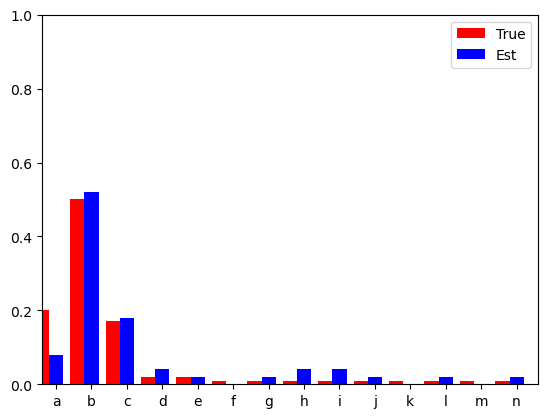

likelihoods:  2.261884241046908e-39 4.3995611125529644e-36
log likelihoods:  inf inf


<ipython-input-6-bfd71f97875e>:129: RuntimeWarning: divide by zero encountered in log10
  log_likelihood = np.log10(0.0)


In [ ]:
'''
Author: Sharon Goldwater 
Date: 2014-09-01, updated 2017-09-30
Copyright: This work is licensed under a Creative Commons
Attribution-NonCommercial 4.0 International License
(http://creativecommons.org/licenses/by-nc/4.0/): You may re-use,
redistribute, or modify this work for non-commercial purposes provided
you retain attribution to any previous author(s).
'''
#from __future__ import division
import sys
from math import log, isclose
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample


#This function isn't actually used in the lab, but included to show
#a simpler example of a bar chart than plot_distributions below.
def plot_histogram(values, counts):
    '''plot_histogram is a very general function that takes a list of
    values and a list of counts (one for each value, counts need no be
    integers), and makes a bar plot showing the count for each value.
    '''
    if len(values) != len(counts):
        print('ERROR: plot_histogram requires two list arguments of the same length')
        sys.exit(1)
    plt.clf()
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(counts)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    plt.bar(x_pos,counts)
    #default bar width is .8, so put labels at left side + .4 (middle of bar)
    plt.xticks(x_pos+.4, values)
    plt.ylim([0,sum(counts)])
    plt.show()

def plot_distributions(true_distr, est_distr):
    ''' plot_distributions takes two distributions, represented as
    dictionaries, with key-value pairs being each outcome and its
    probability.  The first argument is assumed to be the true
    distribution and the second one an estimated distribution. It
    plots these next to each other in a bar plot.  
    '''
    #When we access the items in a dictionary, they are in no
    #particular order, so to make sure the true and estimated
    #probabilities correspond to the same outcome, we need to sort the
    #items in each dictionary, and we also checked to make sure that
    #the keys in the dictionaries match (i.e., they are distributions
    #over the same set of outcomes)
    plt.clf()
    sorted_true = sorted(true_distr.items()) #get sorted list of (key,val) pairs
    #next lines use list comrehension, a concise way to replace for loops
    true_labels = [item[0] for item in sorted_true] #list of keys, still sorted
    true_probs = [item[1] for item in sorted_true] #list of values, still sorted
    sorted_est = sorted(est_distr.items())
    est_labels = [item[0] for item in sorted_est]
    est_probs = [item[1] for item in sorted_est]
    if (true_labels != est_labels):
        print('ERROR: plot_distributions requires two distributions over the same set of outcomes')
        sys.exit(1)
    #the x_pos array will be the position of left side of each bar
    #arange() is like range() except creates an array instead of list
    x_pos = np.arange(len(true_labels))
    bar_width = .4 
    #bar() requires the position and height of each bar;
    #we also add a the width and color
    bars1 = plt.bar(x_pos, true_probs, bar_width, color='r')
    #second distribution has bars shifted to the right by .4
    bars2 = plt.bar(x_pos+.4, est_probs, bar_width, color='b')
    plt.xticks(x_pos+.4, true_labels)
    plt.legend( (bars1[0], bars2[0]), ('True', 'Est'))
    plt.ylim([0,sum(true_probs)]) #set max value of y axis
    plt.xlim([0,len(true_labels)])  #set max value of x axis
    plt.show()

def generate_random_sequence(distribution, N):
    ''' generate_random_sequence takes a distribution (represented as a
    dictionary of outcome-probability pairs) and a number of samples N
    and returns a list of N samples from the distribution.  
    This is a modified version of a sequence generator by fraxel on
    StackOverflow:
    http://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy
    '''
    #As noted elsewhere, the ordering of keys and values accessed from
    #a dictionary is arbitrary. However we are guaranteed that keys()
    #and values() will use the *same* ordering, as long as we have not
    #modified the dictionary in between calling them.
    outcomes = np.array(list(distribution.keys()))
    probs = np.array(list(distribution.values()))
    #make an array with the cumulative sum of probabilities at each
    #index (ie prob. mass func)
    bins = np.cumsum(probs)
    #create N random #s from 0-1
    #digitize tells us which bin they fall into.
    #return the sequence of outcomes associated with that sequence of bins
    #(we convert it from array back to list first)
    return list(outcomes[np.digitize(random_sample(N), bins)])

def normalize_counts(counts):
    ''' normalize_counts takes a dictionary of counts as an argument and
    returns a corresponding dictionary of probabilities by normalizing
    the counts to sum to 1.
    '''
    total_counts = sum(counts.values()) 
    normalized_counts = {key: value / total_counts for key, value in counts.items()}
    ## students need to fill in correct function
    return normalized_counts

def compute_likelihood(data, model):
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the likelihood P(data | model)
    '''
    likelihood = 1
    for str in data:
        likelihood *= model[str]
    ## students need to fill in correct function
    return likelihood
        
def compute_log_likelihood(data, model):        
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the log (base 10) of the
    likelihood
    '''
    log_likelihood = np.log10(0.0)
    for str in data:
        log_likelihood += np.log10(model[str])
    ## students need to fill in correct function
    return -log_likelihood

## Main body of code ##

#Create a dictionary that stores a probability distribution
distribution = dict([('a', 0.2),
                    ('b', 0.5),
                    ('c', 0.17),
                    ('d', 0.02),
                    ('e', 0.02),
                    ('f', 0.01),
                    ('g', 0.01),
                    ('h', 0.01),
                    ('i', 0.01),
                    ('j', 0.01),
                    ('k', 0.01),
                    ('l', 0.01),
                    ('m', 0.01),
                    ('n', 0.01)])
if not (isclose(sum(list(distribution.values())), 1.0)):
    print('ERROR: Probability distribution does not sum to 1')
    sys.exit(1)

#Generate a sequence of 50 samples from the distribution.
str_list = generate_random_sequence(distribution, 50)
#str_list = generate_random_sequence(distribution, 500) #or do 500
print(str_list)

#count how many times each outcome occurred in the sequence and store
#that in a dictionary
#Uses a list comprehension but it could be done with a for loop
str_counts = dict([(s, str_list.count(s)) for s in distribution.keys()])
print('counts:')
print(sorted(str_counts.items()))

#normalize to get an estimate of the original distribution
str_probs = normalize_counts(str_counts)
print('est probs:')
print(sorted(str_probs.items()))

#compare the true and estimated distributions visually
plot_distributions(distribution, str_probs)

#for later parts of lab - these functions currently just return 0
L1 = compute_likelihood(str_list,distribution)
L2 = compute_likelihood(str_list,str_probs)
LL1 = compute_log_likelihood(str_list,distribution)
LL2 = compute_log_likelihood(str_list,str_probs)
print('likelihoods: ', L1, L2)
print('log likelihoods: ', LL1, LL2)

['f', 'b', 'a', 'g', 'h', 'c', 'a', 'c', 'a', 'f', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'c', 'b', 'j', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'c', 'c', 'b', 'b', 'b', 'b', 'c', 'a', 'a']
counts:
[('a', 11), ('b', 27), ('c', 7), ('d', 0), ('e', 0), ('f', 2), ('g', 1), ('h', 1), ('i', 0), ('j', 1), ('k', 0), ('l', 0), ('m', 0), ('n', 0)]
est probs:
[('a', 0.22), ('b', 0.54), ('c', 0.14), ('d', 0.0), ('e', 0.0), ('f', 0.04), ('g', 0.02), ('h', 0.02), ('i', 0.0), ('j', 0.02), ('k', 0.0), ('l', 0.0), ('m', 0.0), ('n', 0.0)]


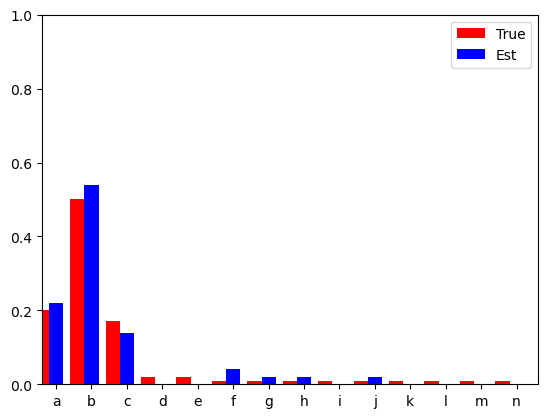

likelihoods:  6.261271255493174e-32 4.6923156979277504e-29
log likelihoods:  31.203337480975787 28.32861277634003


In [ ]:
'''
Author: Sharon Goldwater 
Date: 2014-09-01, updated 2017-09-30
Copyright: This work is licensed under a Creative Commons
Attribution-NonCommercial 4.0 International License
(http://creativecommons.org/licenses/by-nc/4.0/): You may re-use,
redistribute, or modify this work for non-commercial purposes provided
you retain attribution to any previous author(s).
'''
#from __future__ import division
import sys
from math import log, isclose
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample


#This function isn't actually used in the lab, but included to show
#a simpler example of a bar chart than plot_distributions below.
def plot_histogram(values, counts):
    '''plot_histogram is a very general function that takes a list of
    values and a list of counts (one for each value, counts need no be
    integers), and makes a bar plot showing the count for each value.
    '''
    if len(values) != len(counts):
        print('ERROR: plot_histogram requires two list arguments of the same length')
        sys.exit(1)
    plt.clf()
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(counts)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    plt.bar(x_pos,counts)
    #default bar width is .8, so put labels at left side + .4 (middle of bar)
    plt.xticks(x_pos+.4, values)
    plt.ylim([0,sum(counts)])
    plt.show()

def plot_distributions(true_distr, est_distr):
    ''' plot_distributions takes two distributions, represented as
    dictionaries, with key-value pairs being each outcome and its
    probability.  The first argument is assumed to be the true
    distribution and the second one an estimated distribution. It
    plots these next to each other in a bar plot.  
    '''
    #When we access the items in a dictionary, they are in no
    #particular order, so to make sure the true and estimated
    #probabilities correspond to the same outcome, we need to sort the
    #items in each dictionary, and we also checked to make sure that
    #the keys in the dictionaries match (i.e., they are distributions
    #over the same set of outcomes)
    plt.clf()
    sorted_true = sorted(true_distr.items()) #get sorted list of (key,val) pairs
    #next lines use list comrehension, a concise way to replace for loops
    true_labels = [item[0] for item in sorted_true] #list of keys, still sorted
    true_probs = [item[1] for item in sorted_true] #list of values, still sorted
    sorted_est = sorted(est_distr.items())
    est_labels = [item[0] for item in sorted_est]
    est_probs = [item[1] for item in sorted_est]
    if (true_labels != est_labels):
        print('ERROR: plot_distributions requires two distributions over the same set of outcomes')
        sys.exit(1)
    #the x_pos array will be the position of left side of each bar
    #arange() is like range() except creates an array instead of list
    x_pos = np.arange(len(true_labels))
    bar_width = .4 
    #bar() requires the position and height of each bar;
    #we also add a the width and color
    bars1 = plt.bar(x_pos, true_probs, bar_width, color='r')
    #second distribution has bars shifted to the right by .4
    bars2 = plt.bar(x_pos+.4, est_probs, bar_width, color='b')
    plt.xticks(x_pos+.4, true_labels)
    plt.legend( (bars1[0], bars2[0]), ('True', 'Est'))
    plt.ylim([0,sum(true_probs)]) #set max value of y axis
    plt.xlim([0,len(true_labels)])  #set max value of x axis
    plt.show()

def generate_random_sequence(distribution, N):
    ''' generate_random_sequence takes a distribution (represented as a
    dictionary of outcome-probability pairs) and a number of samples N
    and returns a list of N samples from the distribution.  
    This is a modified version of a sequence generator by fraxel on
    StackOverflow:
    http://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy
    '''
    #As noted elsewhere, the ordering of keys and values accessed from
    #a dictionary is arbitrary. However we are guaranteed that keys()
    #and values() will use the *same* ordering, as long as we have not
    #modified the dictionary in between calling them.
    outcomes = np.array(list(distribution.keys()))
    probs = np.array(list(distribution.values()))
    #make an array with the cumulative sum of probabilities at each
    #index (ie prob. mass func)
    bins = np.cumsum(probs)
    #create N random #s from 0-1
    #digitize tells us which bin they fall into.
    #return the sequence of outcomes associated with that sequence of bins
    #(we convert it from array back to list first)
    return list(outcomes[np.digitize(random_sample(N), bins)])

def normalize_counts(counts):
    ''' normalize_counts takes a dictionary of counts as an argument and
    returns a corresponding dictionary of probabilities by normalizing
    the counts to sum to 1.
    '''
    total_counts = sum(counts.values()) 
    normalized_counts = {key: value / total_counts for key, value in counts.items()}
    ## students need to fill in correct function
    return normalized_counts

def compute_likelihood(data, model):
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the likelihood P(data | model)
    '''
    likelihood = 1
    for str in data:
        likelihood *= model[str]
    ## students need to fill in correct function
    return likelihood
        
def compute_log_likelihood(data, model):        
    '''compute_likelihood takes a model (ie distribution, represented
    as a dictionary of outcome-probability pairs) and a list of
    outcomes (the data) and computes the log (base 10) of the
    likelihood
    '''
    # Initialize log likelihood to 0
    log_likelihood = 0.0

    # Iterate over each character in the data sequence
    for char in data:
        # Get the probability of the character from the model
        if char in model:
            prob = model[char]
            # Check if the probability is greater than zero
            if prob > 0:
                log_likelihood += np.log10(prob)
            else:
                # If the probability is zero, the log is undefined, return negative infinity
                return float('-inf')
        else:
            # If character is not in model, it means its probability is effectively 0
            return float('-inf')
    
    return -log_likelihood

## Main body of code ##

#Create a dictionary that stores a probability distribution
distribution = dict([('a', 0.2),
                    ('b', 0.5),
                    ('c', 0.17),
                    ('d', 0.02),
                    ('e', 0.02),
                    ('f', 0.01),
                    ('g', 0.01),
                    ('h', 0.01),
                    ('i', 0.01),
                    ('j', 0.01),
                    ('k', 0.01),
                    ('l', 0.01),
                    ('m', 0.01),
                    ('n', 0.01)])
if not (isclose(sum(list(distribution.values())), 1.0)):
    print('ERROR: Probability distribution does not sum to 1')
    sys.exit(1)

#Generate a sequence of 50 samples from the distribution.
str_list = generate_random_sequence(distribution, 50)
#str_list = generate_random_sequence(distribution, 500) #or do 500
print(str_list)

#count how many times each outcome occurred in the sequence and store
#that in a dictionary
#Uses a list comprehension but it could be done with a for loop
str_counts = dict([(s, str_list.count(s)) for s in distribution.keys()])
print('counts:')
print(sorted(str_counts.items()))

#normalize to get an estimate of the original distribution
str_probs = normalize_counts(str_counts)
print('est probs:')
print(sorted(str_probs.items()))

#compare the true and estimated distributions visually
plot_distributions(distribution, str_probs)

#for later parts of lab - these functions currently just return 0
L1 = compute_likelihood(str_list,distribution)
L2 = compute_likelihood(str_list,str_probs)
LL1 = compute_log_likelihood(str_list,distribution)
LL2 = compute_log_likelihood(str_list,str_probs)
print('likelihoods: ', L1, L2)
print('log likelihoods: ', LL1, LL2)

In [ ]:
np.log10(6.26e-32)

-31.20342566678957